## **4 (GMM EM) Generate Figure 9.8 using the Old Faithful.**



In [63]:
# Importing required libraries.
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
%matplotlib inline

In [64]:
# Importing old-faithful data using dataframe.
df = pd.read_csv ("faithful.csv")
df.head()

,id,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [65]:
# initial dataset
data = np.dstack((df["eruptions"], df["waiting"]))[0]
#print(data.shape)
x = data[:, 0]
y = data[:, 1]

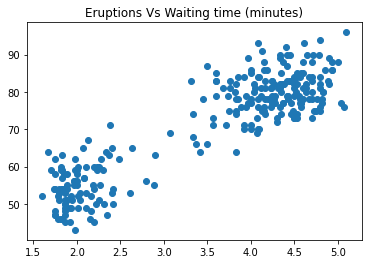

In [66]:
# scatter plot to visualise dataset
plt.scatter(x, y)
plt.title('Eruptions Vs Waiting time (minutes)')

# Plotting initial dataset before Normalisation.
plt.show()

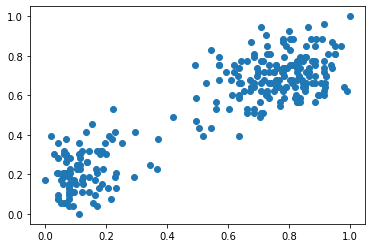

In [75]:
# Applying Min-Max Normalisation algorithms to bring data between 0 and 1.
data[:,0] = (data[:,0] - np.amin(data[:,0]))/(np.amax(data[:,0]) - np.amin(data[:,0]))
data[:,1] = (data[:,1] - np.amin(data[:,1]))/(np.amax(data[:,1]) - np.amin(data[:,1]))

# Plotting the normalised old-faithful dataset 
plt.scatter(data[:, 0], data[:, 1])
plt.show()

**Log Likelihood of GMM**

In [68]:
# Calculating log likelihood of the GMM using mean, covariance, and mixing coefficient.
def Log_Likelihood_GMM(X, mean, cov, M_coef):
    log_likelihood = 0
    for val in range(X.shape[0]):
        sum = 0
        for coef in range(M_coef.shape[0]):
            sum += M_coef[coef] * multivariate_normal.pdf(X[val], mean=mean[coef], cov=cov[coef])
        log_likelihood += np.log(sum)
    return log_likelihood

**E step calculations**

E step is calculating the responsibilities of GMM for creating the given training data point

In [69]:
def E_step_of_GMM(X, mean, cov, M_coef):

    Res = np.zeros((X.shape[0],mean.shape[0]))
    num = np.zeros(M_coef.shape[0])
    Temp = 0
    for n in range(X.shape[0]):

        Temp = 0
        for k in range(M_coef.shape[0]):
            num[k] = M_coef[k] * multivariate_normal.pdf(X[n,:], mean[k,:], cov[k,:,:])
            Temp += M_coef[k] * multivariate_normal.pdf(X[n,:], mean[k, :], cov[k,:,:])

        for k in range(M_coef.shape[0]):
            Res[n,k] = num[k] / Temp
            
    return Res

**M step calculations**

For a given responsibilities, M step is updating the parameters of GMM.

In [70]:
def M_step_of_GMM(X, Res):

    N = np.zeros(Res.shape[1])

    # iterating over clusters to optimise mean and covariance.
    for k in range(Res.shape[1]):
        N[k] = Res[:,k].sum(axis=0)
        sum_mean = 0
        sum_cov = 0

        # storing new mean in new mean.
        for i in range(X.shape[0]):
            sum_mean += Res[i,k] * X[i, :]
        sum_mean /= N[k]

        # storing new cov in new_cov.
        for i in range(X.shape[0]):
            A = X[i, :] - sum_mean
            sum_cov += Res[i,k] *np.outer(A, A.T)
        mean[k,:] = sum_mean
        cov[k,:,:] = sum_cov / N[k]

    NN = N.sum(axis=0)
    M_coef = N / NN
    
    return mean, cov, M_coef

Visualising and plotting the results of bivariate mixing.

In [71]:
def GMM_PLOT(X, Res, mean, cov, M_coef):

    set_of_color = np.array(sns.color_palette('bright'))[[0, 2]]
    colors = Res.dot(set_of_color)

    # Plot the samples colored according to p(z|x)
    plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=1)

    # Circling the locations of the mean.
    for ix, m in enumerate(mean):
        plt.scatter(m[0], m[1], s=220, marker='X', edgecolors='yellow', linewidths=1,)

    # Plotting contours of the Gaussian mixture.
    x = np.linspace(0, 1, 75)
    y = np.linspace(0, 1, 75)
    xx, yy = np.meshgrid(x, y)
    for k in range(len(M_coef)):
        rv = scipy.stats.multivariate_normal([mean[k][0], mean[k][0]], [[np.sqrt(cov[k][0, 0]), cov[k][0, 1]], [cov[k][0, 1], np.sqrt(cov[k][1, 1])]])
        zz = rv.pdf(np.dstack((xx, yy)))
        plt.contour(xx, yy, zz, 4, colors='red')

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

**Final plot of EM algorithm for each iterations**

At initialization, the plot of Gaussian mixture and contour



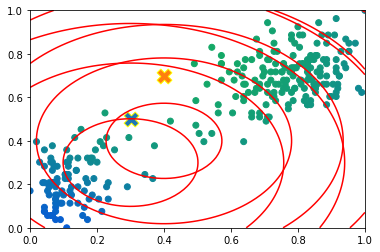



Plot after 1 iterations.



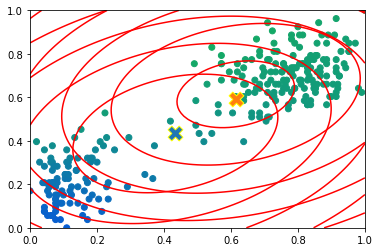



Plot after 2 iterations.



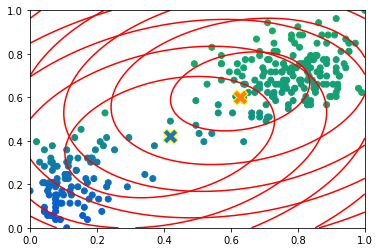



Plot after 5 iterations.



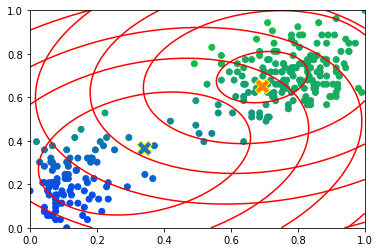



Plot after 15 iterations.



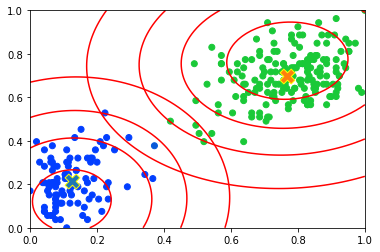



Plot after 20 iterations.



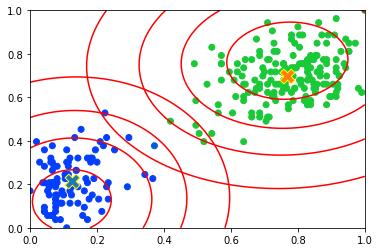

In [72]:
# fixing the number of iterations.
max_iters = 21

# Initialize the parameters [mean, cov, Mixing coefficient]
mean = np.array([[0.3, 0.5], [0.4, 0.7]])
cov = np.array([0.3 * np.eye(2), 0.1 * np.eye(2)])
M_coef = np.array([0.5, 0.5])
log_likelihood = Log_Likelihood_GMM(data, mean, cov, M_coef)
Res = E_step_of_GMM(data, mean, cov, M_coef)
print('At initialization, the plot of Gaussian mixture and contour\n')
GMM_PLOT(data, Res, mean, cov, M_coef)
print("\n")

for i in range(max_iters):
    Res = E_step_of_GMM(data, mean, cov, M_coef)
    mean, cov, M_coef = M_step_of_GMM(data, Res)
    new_log_likelihood = Log_Likelihood_GMM(data, mean, cov, M_coef)
    # Report & visualize the optimization progress
    log_likelihood = new_log_likelihood
    if i==1 or i==2 or i==5 or i==15 or i==20:
       print("Plot after",i,"iterations.\n")
       GMM_PLOT(data, Res, mean, cov, M_coef)
       print("\n")

**OBSERVATIONS :-**



```
1. Results of 20 iterations illustrates that EM algorithm fitting a two component Gaussian mixture model to the Old Faithful dataset. 
   The algorithm steps through a random initialization to convergence.
2. The two clusters in data interprets that there are two series of eruptions in Old Faithful geyser, one eruptions with short intervals and 
   other eruptions with long intervals.
3. The approach that is implemented in this scenario with K-means could provide predictions for future eruptions in terms of their duration and 
   waiting time but may vary depending on conditions including atmospheric temperature, availability of water, wind speed and distant earthquakes 
   etc.
```



